In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gpmap.utils import hamming_distance

from latticeproteins.conformations import Conformations
from latticegpm.gpm import LatticeGenotypePhenotypeMap
from epistasis.models.nonlinear.regression import EpistasisNonlinearRegression
from epistasis.models.linear.regression import EpistasisLinearRegression
from epistasis.models.nonlinear.power import EpistasisPowerTransform

In [2]:
length = 8
temperature = 1.0
dGdependence= "fracfolded"
confs = Conformations(length)

In [3]:
import time

In [4]:
gpm = LatticeGenotypePhenotypeMap.from_length(8, confs)

In [5]:
from epistasis.models.transformations import EpistasisLinearTransformation

In [6]:
gpm.phenotype_type="nativeEs"
model = EpistasisLinearTransformation.from_gpm(gpm, model_type="global")

In [7]:
model.fit()

In [8]:
model.epistasis.to_json("coefs.json")

In [10]:
gpm.to_json("space-1.json")

In [7]:
type(gpm.folded[0])

numpy.bool_

In [21]:
gpm.genotypes

array(['GVCKCLCFVTEGVED', 'GVCKCLCFVTEGVEN', 'GVCKCLCFVTEGVVD', ...,
       'REWSIMMMGWGYYEN', 'REWSIMMMGWGYYVD', 'REWSIMMMGWGYYVN'], 
      dtype='<U15')

In [22]:
plt.plot(model.predict_linear(), model.gpm.phenotypes, '.')

NameError: name 'model' is not defined

[0, 4000, -0.01, 0.01]

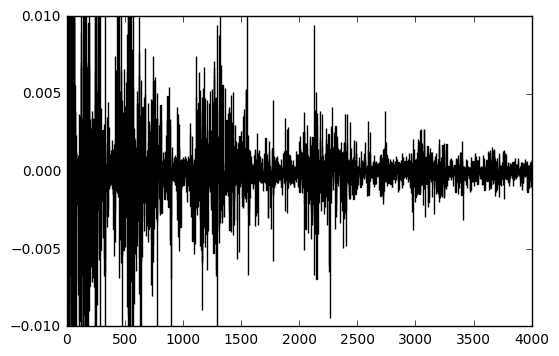

In [12]:
y = model.epistasis.values[12+1:]
x = range(len(y))
plt.bar(x, y, width=1)
plt.axis([0,4000,-0.01,0.01])